### Coursera self-paced course (Social network analysis using Python)
**Course link:** [Applied Social network analysis (using Python)](https://www.coursera.org/learn/python-social-network-analysis "Applied Social network analysis (using Python)")
Why are networks important and what can we study using them?
- **Email communication network: **to study where the emails are most exchanged between to estimate the most influential person in the organisation. **Or** how likely is a rumour to spread and at what rate, and maybe in which cluster?
- **Friendship or Club network: **to study which groups can potentially fall-off into seperate clusters and maybe from their child cults, from the parent group?
- **Flight transportation network: ** to study which airports are at the highest risk for virus spreading?

In [65]:
import networkx as nx
%matplotlib notebook

In [66]:
nx.__version__

'2.5'

In [4]:
G = nx.Graph()
# Creating a undirected edges graph network; with edge attributes (relationships)
# undirected networks can help establish two-way relationships (where direction is not important)
G.add_edge("Yasir", "Hamza", relation='brother')
G.add_edge("Yasir", "Marium", relation='sister')
G.add_edge("Marium", "hamza", relation='sister')

In [5]:
G.edges(data=True)

EdgeDataView([('Yasir', 'Hamza', {'relation': 'brother'}), ('Yasir', 'Marium', {'relation': 'sister'}), ('Marium', 'hamza', {'relation': 'sister'})])

### Mapping a network diagram to NetworkX (Directed graph with weights & attributes)
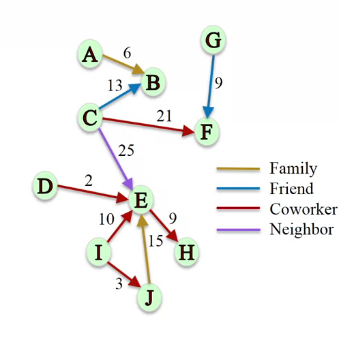

In [6]:
DG = nx.DiGraph()
# Creating a Directed edges graph network; with edge attributes (relationships)
# Directed networks can help establish one-way relationships (eg: No. of emails sent, from whom to who)

In [7]:
DG.add_edge("A", "B", weight=6, relation="family")
DG.add_edge("C", "B", weight=13, relation="friend")
DG.add_edge("C", "F", weight=21, relation="coworker")
DG.add_edge("G", "F", weight=9, relation="friend")
DG.add_edge("C", "E", weight=25, relation="neighbour")
DG.add_edge("D", "E", weight=2, relation="coworker")
DG.add_edge("I", "E", weight=10, relation="coworker")
DG.add_edge("I", "J", weight=3, relation="coworker")
DG.add_edge("J", "E", weight=15, relation="family")
DG.add_edge("E", "H", weight=9, relation="coworker")

In [8]:
DG.edges(data=True)

OutEdgeDataView([('A', 'B', {'weight': 6, 'relation': 'family'}), ('C', 'B', {'weight': 13, 'relation': 'friend'}), ('C', 'F', {'weight': 21, 'relation': 'coworker'}), ('C', 'E', {'weight': 25, 'relation': 'neighbour'}), ('G', 'F', {'weight': 9, 'relation': 'friend'}), ('E', 'H', {'weight': 9, 'relation': 'coworker'}), ('D', 'E', {'weight': 2, 'relation': 'coworker'}), ('I', 'E', {'weight': 10, 'relation': 'coworker'}), ('I', 'J', {'weight': 3, 'relation': 'coworker'}), ('J', 'E', {'weight': 15, 'relation': 'family'})])

To access edges for particular nodes; you can use the following commands

In [9]:
DG["C"]["E"]

{'weight': 25, 'relation': 'neighbour'}

In [10]:
print("The weight is: %s" %(DG["A"]["B"]["weight"]))

The weight is: 6


<IPython.core.display.Javascript object>


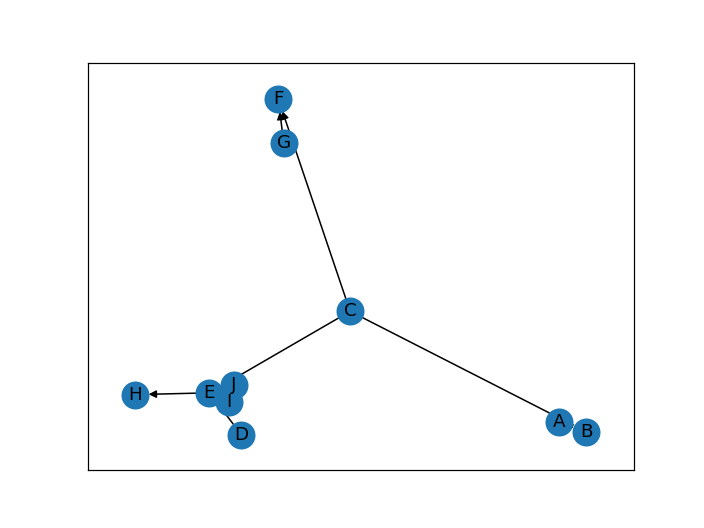

In [67]:
nx.draw_networkx(DG)

### Mapping a network diagram to NetworkX (Multi-graph undirected with weights & attributes)
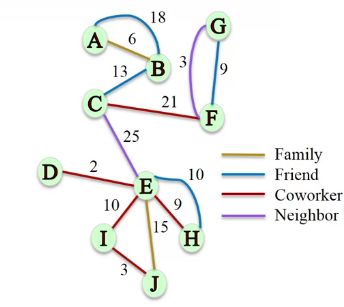

#### nx.MultiDiGraph()
this would give you a directed Multi-graph

In [26]:
M = nx.MultiGraph()

In [27]:
M.add_edge("A", "B", weight=6, relation="family")
M.add_edge("A", "B", weight=18, relation="friend")

M.add_edge("C", "B", weight=13, relation="friend")
M.add_edge("C", "F", weight=21, relation="coworker")

M.add_edge("G", "F", weight=9, relation="friend")
M.add_edge("G", "F", weight=3, relation="neighbour")

M.add_edge("C", "E", weight=25, relation="neighbour")
M.add_edge("D", "E", weight=2, relation="coworker")
M.add_edge("I", "E", weight=10, relation="coworker")
M.add_edge("I", "J", weight=3, relation="coworker")
M.add_edge("J", "E", weight=15, relation="family")

M.add_edge("E", "H", weight=9, relation="coworker")
M.add_edge("E", "H", weight=10, relation="friend")

1

In [47]:
M.edges(data=True)

MultiEdgeDataView([('A', 'B', {'weight': 6, 'relation': 'family'}), ('A', 'B', {'weight': 18, 'relation': 'friend'}), ('B', 'C', {'weight': 13, 'relation': 'friend'}), ('C', 'F', {'weight': 21, 'relation': 'coworker'}), ('C', 'E', {'weight': 25, 'relation': 'neighbour'}), ('F', 'G', {'weight': 9, 'relation': 'friend'}), ('F', 'G', {'weight': 3, 'relation': 'neighbour'}), ('E', 'D', {'weight': 2, 'relation': 'coworker'}), ('E', 'I', {'weight': 10, 'relation': 'coworker'}), ('E', 'J', {'weight': 15, 'relation': 'family'}), ('E', 'H', {'weight': 9, 'relation': 'coworker'}), ('E', 'H', {'weight': 10, 'relation': 'friend'}), ('I', 'J', {'weight': 3, 'relation': 'coworker'})])

M.edge['A']['B'] would not work here because the NetworkX in this notebook is of version 2.5, need to downgrade to 1.x

In [32]:
M.adj['A']['B']

AtlasView({0: {'weight': 6, 'relation': 'family'}, 1: {'weight': 18, 'relation': 'friend'}})

In [49]:
for N1, N2, edge_attribute in M.edges(data=True):
    print("Node pairs %s, %s has relation: %s" %(N1, N2, edge_attribute["relation"]))

Node pairs A, B has relation: family
Node pairs A, B has relation: friend
Node pairs B, C has relation: friend
Node pairs C, F has relation: coworker
Node pairs C, E has relation: neighbour
Node pairs F, G has relation: friend
Node pairs F, G has relation: neighbour
Node pairs E, D has relation: coworker
Node pairs E, I has relation: coworker
Node pairs E, J has relation: family
Node pairs E, H has relation: coworker
Node pairs E, H has relation: friend
Node pairs I, J has relation: coworker


<IPython.core.display.Javascript object>


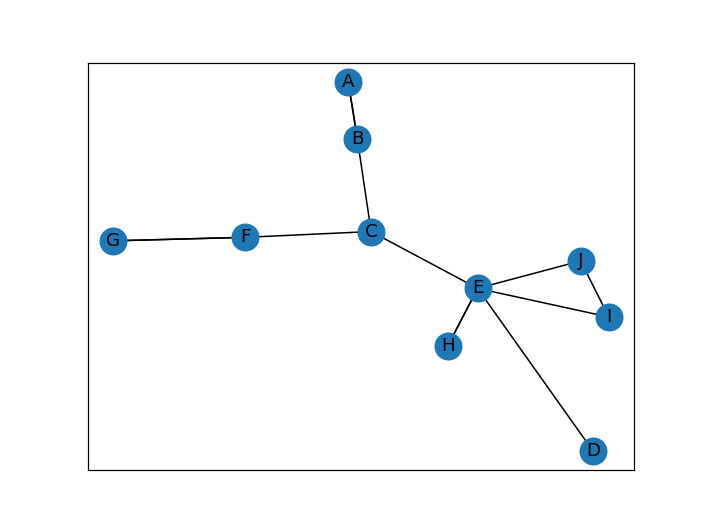

In [68]:
nx.draw_networkx(M)

### Lets consider Node attributes, and edge attributes (undirected graphs)
Remember: **Edge attributes** identifies relationships between two nodes
**Node attributes** identifies properties regarding that particular node

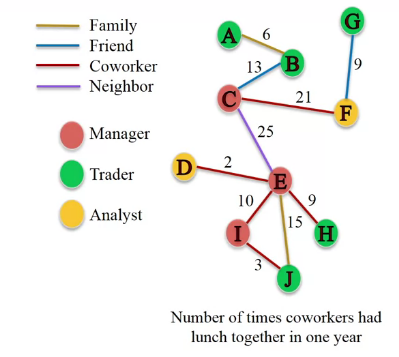

In [52]:
Y = nx.Graph()

In [53]:
Y.add_node('A', role="trader")
Y.add_node('B', role="trader")
Y.add_node('C', role="manager")
Y.add_node('D', role="analyst")
Y.add_node('E', role="manager")
Y.add_node('F', role="analyst")
Y.add_node('G', role="trader")
Y.add_node('H', role="trader")
Y.add_node('I', role="manager")
Y.add_node('J', role="trader")

In [58]:
list(Y.nodes(data=True))

[('A', {'role': 'trader'}),
 ('B', {'role': 'trader'}),
 ('C', {'role': 'manager'}),
 ('D', {'role': 'analyst'}),
 ('E', {'role': 'manager'}),
 ('F', {'role': 'analyst'}),
 ('G', {'role': 'trader'}),
 ('H', {'role': 'trader'}),
 ('I', {'role': 'manager'}),
 ('J', {'role': 'trader'})]

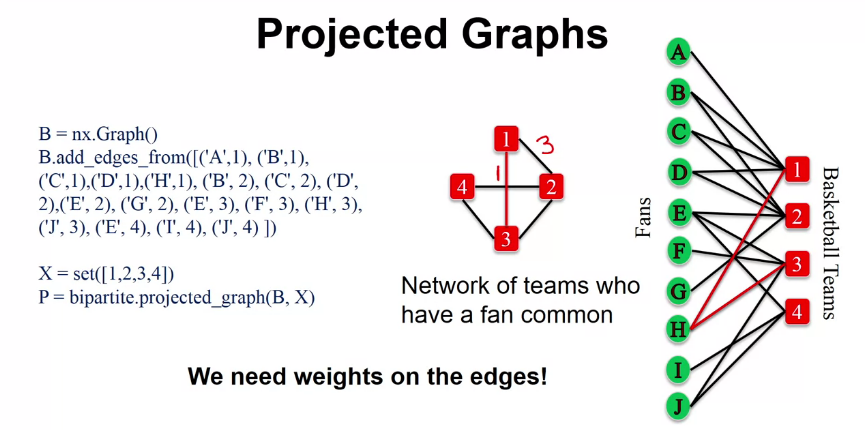

In [63]:
import networkx as nx
from networkx.algorithms import bipartite

B = nx.Graph()
B.add_edges_from([('A', 'G'),('A','I'), ('B','H'), ('C', 'G'), ('C', 'I'),('D', 'H'), ('E', 'I'), ('F', 'G'), ('F', 'J')])
X1 = set(['A', 'B', 'C', 'D', 'E', 'F'])
Y = bipartite.weighted_projected_graph(B, X1)

In [64]:
Y.edges(data=True)

EdgeDataView([('F', 'C', {'weight': 1}), ('F', 'A', {'weight': 1}), ('E', 'C', {'weight': 1}), ('E', 'A', {'weight': 1}), ('A', 'C', {'weight': 2}), ('D', 'B', {'weight': 1})])